Author: Gaël Penessot  
Email: gael.penessot@data-decision.io

## **Table of contents**

1. Project Motivation
2. The Dataset
3. Analysis Plan
4. Performance Metrics
5. Exploratory Data Analysis
6. Exploratory Data Analysis Summary
7. Feature Engineering
8. Model Development
9. Conclusion and Recommendations
10. References

## **1. Project Motivation**

**Can a used car price be predict using machine learning?**

Buyers, car fleet managers, used car dealers and car insurers have to evaluate the ‘right’ price for a used car. More than the right price, they thrive on identifying the car depreciation because it impacts all subsequent decisions: should the owner sell the car? What is the replacement value of the car for the insurer? Should the car be sold by the car fleet manager?

Actual used car price is a key topic for these stakeholders. However, today’s online calculators mostly estimate the price of a used car based on age and on retail price of the vehicle. Other depreciation calculators use straight line depreciation (the simplest method). Even though this approach might be interesting to calculate the average price of a cohort of similar vehicles, it does not take into account the differences among similar cars. Another approach consists in consulting an expert for his/her appraisal of the vehicle, which is accurate but costly. And last but not least, it is possible for the savvy buyer/seller to check the listings of similar vehicles both online and in physical stores. However, this strategy is very time consuming. Using predictive models based on our available data can help these different stakeholders better estimate their selling and buying prices for used cars in an affordable and quick way.


**Problems to solve**  
- Can the depreciation of a car be estimated using machine learning?  
- What is the fair market price of a used car?  
- Is it possible to get a ‘reference’ price for a used car which takes into account its peculiarities?  

## **2. The Dataset**

The data used in this project can be obtained from the DataCamp Career Hub Git repository [1] and is about BMW Used Car Sales.

### **2.1 Data Description**

The data consists of 9 input variables and a target variable corresponding to the price of the car.

### **2.2 Attribute Information**

| Name | Description | Type |
|:-----|:------------|:-----|
|model | Car model   |object|
|year  | Year of car|int64 |
|price|Price|int64|
|transmission|Type of transmission|object|
|mileage|Mileage|int64|
|fuelType|Fuel type|object|
|tax|Tax|int64|
|mpg|Fuel consumption|float64|
|engineSize|Engine size|float64|

## **3. Analysis plan**

This is a multiple regression problem. The following steps will be followed:  

- Identify suitable performance metrics based on what is known about the problem at this stage.
- Exploratory data analysis to identify data problems and discover any initial insights.
- Process features in order to correct data problems and make model training more efficient.
- Select a suitable algorithm based on the information gained during exploratory analysis.
- Fit, fine tune, evaluate and validate a model.
- Discuss the merits of and improvements of the model.

## **4. Performance Metrics**

### **4.1 Notations**

In the following paragraph, we will use the following notations :  

- $\hat{Y}$ : fitted values
- $Y$ : target
- $\bar{Y}$ : average target
- $X$ : features

### **4.2 Defitions**

**Root Mean Square Error (RMSE)**

The most important performance metrics [2] from a data science perspective is root mean squared error, or *RMSE*. RMSE is the square root of the average squared error in the predicted $\hat{y}_{i}$ values:  

$$ RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat{y}_{i})^2}$$ 

This measures the overall accuracy of the model and is a basis for comparing it to other models (including models fit using machine learning techniques).

**Residual Standard Error (RSE)**

Similar to RMSE is the *residual standard error*, or RSE. In this case, we have *p* predictors, and the RSE is given by:  

$$ RSE = \sqrt{\frac{\sum_{i=1}^{n}(y_{i} - \hat{y}_{i})^2}{n-p-1}} $$

The only difference is that denominator in the degrees of freedom, as opposed to number of records. In practice, for linear regression, the difference between RMSE and RSE is very small, particularly for big data applications.

**R-square**

Another useful metric is the coefficient of dertermination, also called the R-squared statistics or *R²*. R-squared ranges from 0 to 1 and measure the proportion of variation in the data that is accounted for in the model. It is usefaul mainly in exploratory uses of regression where you want to asses how well the model fits the data. The formua for *R²* is :  

$$ R^2 = 1 - \frac{\sum_{i=1}^{n}(y_{i} - \hat{y}_{i})^2}{\sum_{i=1}^{n}(y_{i} - \bar{y})^2} $$

The denominator is proportional to the variance of Y. The output from R also reports an adjusted R-squared, which adjusts for the degrees of freedom, effectively penalizing the addiction of more predictors to a model. Seldom is this significantly different from R-squared in multiple regression with large data sets.

## **5. Exploratory Data Analysis**

In [3]:
# Import modules needed exploratory analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import ppscore as pps

# Color set for graphs
magma = sns.color_palette("magma")
col_list = magma.as_hex()

# Setting seaborn style
sns.set_style("whitegrid")

%matplotlib inline

In [4]:
# Import and check the automatically assigned data types
git_data = './bmw.csv'
bmw_raw_data = pd.read_csv(git_data)
bmw_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [5]:
bmw_raw_data.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


In [6]:
for col in bmw_raw_data.select_dtypes(include=['object']):
    bmw_raw_data[col] = bmw_raw_data[col].astype('string')

In [7]:
# Determine the number of observations in the dataset
initial_len = bmw_raw_data.shape[0]
print('Initial dataset length : {}'.format(initial_len))
bmw_raw_data.shape

Initial dataset length : 10781


(10781, 9)

In [8]:
# Check for missing values
print("Count of missing values in each column of the dataset:")
bmw_raw_data.isna().sum()

Count of missing values in each column of the dataset:


model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

The dataset is clean, there are no missing values.

### **5.1 Year feature**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

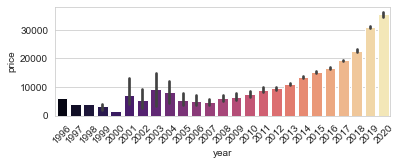

In [9]:
plt.figure(figsize=(6,2))
sns.barplot(data=bmw_raw_data, 
            x='year',
            y='price', palette='magma')
plt.xticks(rotation=45)

The older cars seems to be less numerous than others, generating unbalanced classes. We can confirm by checking the number of car by year.

Text(0, 0.5, 'Number of car')

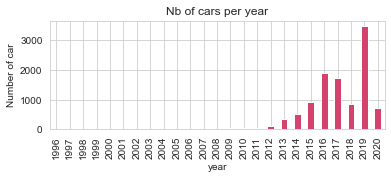

In [10]:
plt.figure(figsize=(6,2))
car_by_year = bmw_raw_data.groupby('year')['model'].count().plot(kind='bar', color=col_list[3])
plt.title('Nb of cars per year')
plt.ylabel('Number of car')

In the next steps, we will filter the year feature to keep those with significant number of cars.

### **5.2 Price feature**

1.59

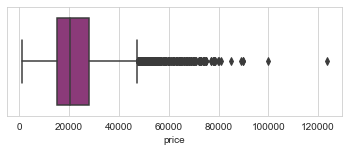

In [11]:
# Checking price distribution
plt.figure(figsize=(6,2))
sns.boxplot(bmw_raw_data['price'], color=col_list[2])
bmw_raw_data['price'].skew().round(2)

The price skewness is quite important. It could be interesting to use log function to correct skewness.

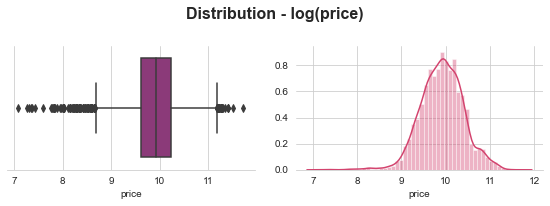

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(8,3))
magma = sns.color_palette("magma")
col_list = magma.as_hex()

fig.suptitle('Distribution - log(price)', fontsize=16, weight='bold')

sns.boxplot(np.log(bmw_raw_data['price']), color=col_list[2], ax=axs[0])
axs[0].tick_params(bottom=False)

sns.distplot(np.log(bmw_raw_data['price']), color=col_list[3], ax=axs[1])
axs[1].tick_params(bottom=False)

sns.despine(left=True)
fig.tight_layout(pad=2.0, h_pad=2.0)
plt.subplots_adjust(top=0.80)

In [13]:
np.log(bmw_raw_data['price']).skew().round(2)

-0.24

Using the log of the price feature gives a better skewness coefficient.  

A lot of other features are skewed. This features will be processing twice :  

- outliers will be removed in order to optimize regression, it will be controlled with boxplot and skewness coefficient
- all features will be scaled

We will see the details in the next chapters.  

In [14]:
bmw_raw_data['price'] = np.log(bmw_raw_data['price']+1)

### **5.3 Correlation matrix**

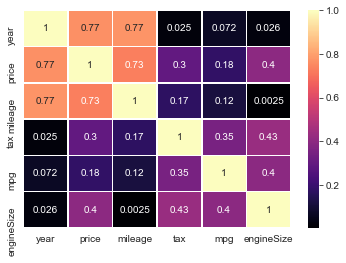

In [15]:
# Quick overview of the correlation of numerical features
sns.heatmap(bmw_raw_data.corr().abs(), 
            annot=True,
            linewidths=.5,
            cmap='magma')

c:\users\h19656\downloads\portable python-3.7.4 x64\app\python\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
c:\users\h19656\downloads\portable python-3.7.4 x64\app\python\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
c:\users\h19656\downloads\portable python-3.7.4 x64\app\python\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
c:\users\h19656\downloads\portable python-3.7.4 x64\app\python\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.

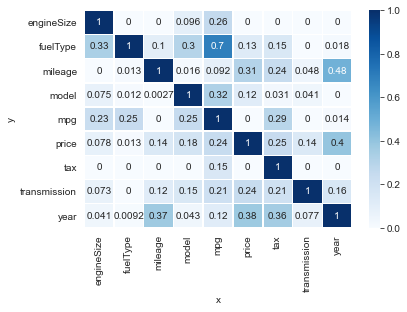

In [16]:
matrix_df = pps.matrix(bmw_raw_data)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

A key goal of regression analysis is to isolate the relationship between each independent variable and the dependent variable. The interpretation of a regression coefficient is that it represents the mean change in the dependent variable for each 1 unit change in an independent variable when you hold all of the other independent variables constant.  

When independent variables are correlated, it indicates that changes in one variable are associated with shifts in another variable. The stronger the correlation, the more difficult it is to change one variable without changing another. It becomes difficult for the model to estimate the relationship between each independent variable and the dependent variable independently because the independent variables tend to change in unison.  

From the previous heatmap, we can see that some features are correlated to others :  

- price and year
- mileage and year
- mileage and price

The potential solutions include the following:  

- Remove some of the highly correlated independent variables.
- Linearly combine the independent variables.
- Perform an analysis designed for highly correlated variables, such as principal components analysis (PCA).

### **5.4 Pairplot**

The pairplot() function of seaborn helps in creating an axes grid through which each numeric variable present in data is shared across y-axes in the form of rows and across x-axes in form of a column. Scatter plots are created to show pairwise relationships and in the diagonal, the distribution plot is created to show the distribution of the data in the column.

In [17]:
from scipy.stats import pearsonr
#import matplotlib.pyplot as plt 

def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

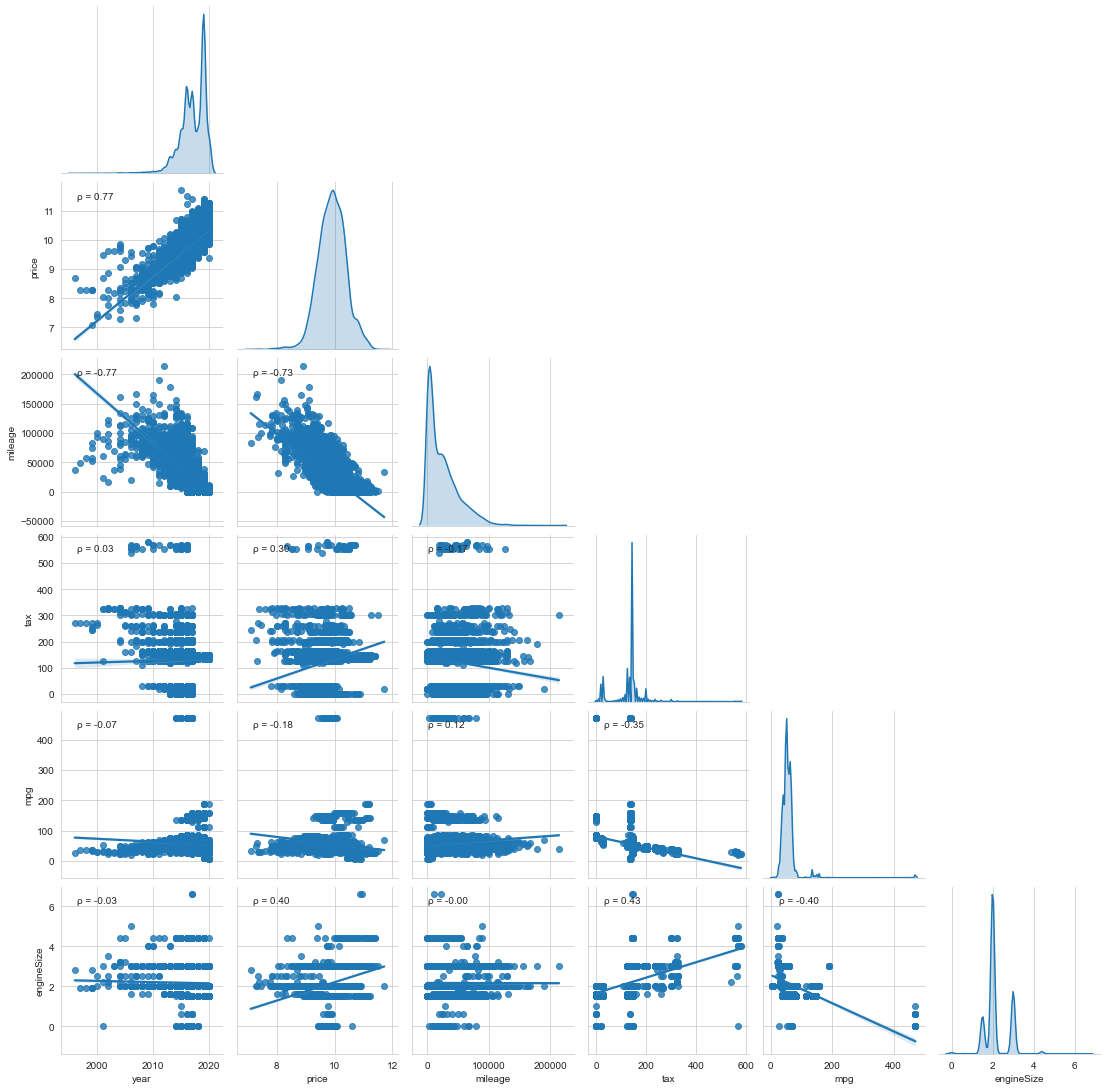

In [18]:
g = sns.pairplot(data = bmw_raw_data,
                 diag_kind='kde',
                 kind='reg',
                 corner=True)
g.map_lower(corrfunc)
plt.show()

## **6. Exploratory Data Analysis Summary**

What do we have learn from EDA ? 

- A lot of features are highly skewed, it might indicates the presence of outliers, a complete study must be done.
- Once outliers filtered, a scaling operation on features should be done, for the price in particular.
- We have an issue with multicollinearity, some features engineering is needed to solve it. 
- There are no missing values, the data set is clean, there are no abnormal values in categorical features.
- Model feature contains 24 models. If we use one hot encoding for example, it will generate too much features. It's a good idea to simplify this features.

## **7. Feature engineering**

### **7.1 Creating a 'range' feature**

In the next step, we are going to encode category feature. There is an issue with the model because it generates too much features once encoded (one hot encoding technic). One solution is to reduced the number of elements by using the range of the car instead of the precise model (from 24 models to 5 ranges).

In [19]:
# We can strip the name of models to make the processing of models easier
bmw_raw_data['model'] = bmw_raw_data['model'].str.strip()

In [20]:
bmw_raw_data['model'].unique()

<StringArray>
['5 Series', '6 Series', '1 Series', '7 Series', '2 Series', '4 Series',
       'X3', '3 Series',       'X5',       'X4',       'i3',       'X1',
       'M4',       'X2',       'X6', '8 Series',       'Z4',       'X7',
       'M5',       'i8',       'M2',       'M3',       'M6',       'Z3']
Length: 24, dtype: string

In [21]:
def model_to_range(df):
    """
    This function arg is the BMW used cars dataframe
    It converts model to range in order to simplify 
    the number of categories.
    """
    if df['model'].startswith('X'):
        df['range'] = 'X'
    elif df['model'].startswith('M'):
        df['range'] = 'M'
    elif df['model'].startswith('Z'):
        df['range'] = 'Z'
    elif df['model'].startswith('i'):
        df['range'] = 'i'
    else :
        df['range'] = 'S'
    
    return df

In [22]:
bmw_raw_data = bmw_raw_data.apply(model_to_range, axis=1)

In [23]:
# Let's check if the range column is well defined
bmw_raw_data['range'].unique()

array(['S', 'X', 'i', 'M', 'Z'], dtype=object)

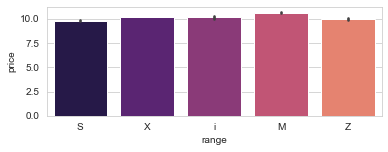

In [24]:
plt.figure(figsize=(6,2))
sns.barplot(data=bmw_raw_data, x='range', y='price', palette=magma)

### **7.2 Combining features to eliminate collinearity issues**

### **7.2.1 price_per_mile feature**

We create a new feature to combine price and mileage.

In [25]:
bmw_raw_data['price_per_mile'] = bmw_raw_data['price']/bmw_raw_data['mileage']

Text(0.5, 1.0, 'log(price_per_mile)')

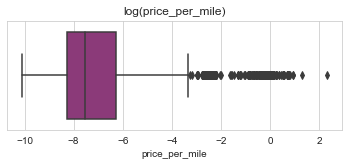

In [26]:
plt.figure(figsize=(6,2))
sns.boxplot(np.log(bmw_raw_data['price_per_mile']), color=col_list[2])
plt.title('log(price_per_mile)')

### **7.2.2 mile_per_year feature** 

We create a new feature to combine mileage and car's oldness.

In [27]:
bmw_raw_data['oldness'] = 2021 - bmw_raw_data['year'] 

In [28]:
bmw_raw_data['mile_per_year'] = bmw_raw_data['mileage']/bmw_raw_data['oldness']

Text(0.5, 1.0, 'log(mile_per_year)')

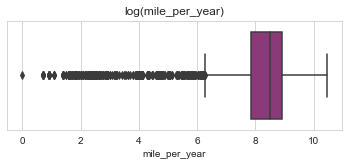

In [29]:
plt.figure(figsize=(6,2))
sns.boxplot(np.log(bmw_raw_data['mile_per_year']),color=col_list[2])
plt.title('log(mile_per_year)')

### **7.3 Removing unused features**

In [30]:
bmw_prepoc_data_0 = bmw_raw_data.copy()
bmw_prepoc_data_0 = bmw_prepoc_data_0.drop(['mileage', 'year', 'oldness', 'model'], axis=1)

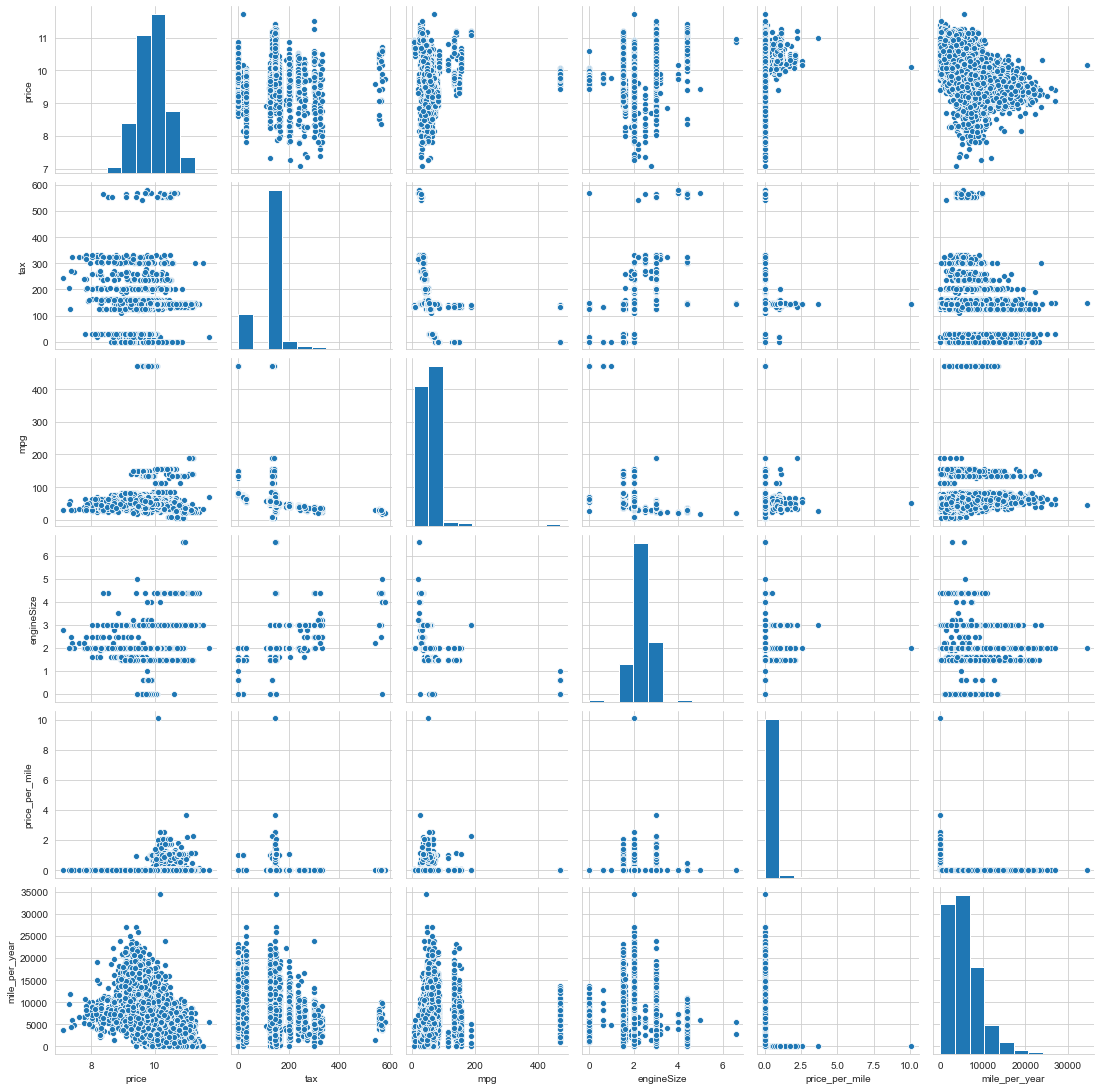

In [31]:
sns.pairplot(bmw_prepoc_data_0)

In [32]:
bmw_prepoc_data_0.corr()

,price,tax,mpg,engineSize,price_per_mile,mile_per_year
price,1.000000,0.296282,-0.179451,0.400086,0.167208,-0.541387
tax,0.296282,1.000000,-0.351798,0.429616,0.036877,-0.234842
mpg,-0.179451,-0.351798,1.000000,-0.399844,-0.039477,0.155734
engineSize,0.400086,0.429616,-0.399844,1.000000,-0.007541,-0.024529
price_per_mile,0.167208,0.036877,-0.039477,-0.007541,1.000000,-0.257696
mile_per_year,-0.541387,-0.234842,0.155734,-0.024529,-0.257696,1.000000


### **7.4 Outliers detection and filtering**

If the data include even if one outlier, it has the potential to dramatically skew the calculated parameters. Therefore, it is of utmost importance to analyze the data without those deviant points. It is also important to understand which of the data points are considered as outliers. Extreme data points do not always necessarily mean those are outliers.

The following methods can be used :  

- Inter quartile range (IQR) method
- Hampel method
- Z-score method

The idea is to select the method which is the best compromise between data quality and number of rows erased.
Z-score method is interesting in this case beacuse it keeps almost 94% of the dataset.

Let's examine the numercial features. Both boxplot vizualisations and skewness score will be used to spot outliers.

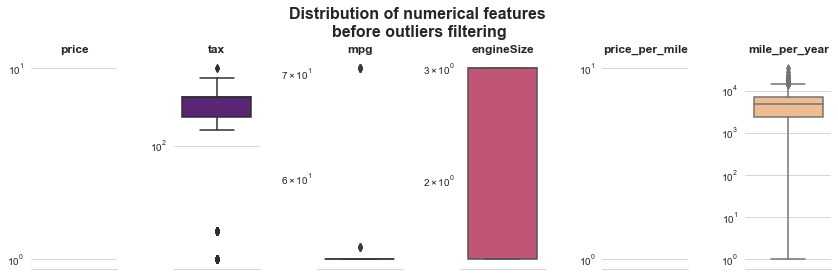

In [33]:
sns.set_style("whitegrid")
fig, axs = plt.subplots(1, 6, 
                        figsize=(12,4)
                       )

fig.suptitle('Distribution of numerical features \nbefore outliers filtering', fontsize=16, weight='bold')
for i, col in enumerate(bmw_prepoc_data_0.select_dtypes(exclude=['object']).columns):
    data=bmw_prepoc_data_0[col]
    sns.boxplot(data=data, 
                ax=axs[i],
                y=data,
                color=col_list[i])
    axs[i].set_title(col, weight='bold')
    axs[i].tick_params(bottom=False)
    axs[i].set(ylabel=None)
    axs[i].set_yscale('log')

sns.despine(left=True)
#plt.yscale("log")
fig.tight_layout(pad=2.0, h_pad=2.0)
plt.subplots_adjust(top=0.80)

In [34]:
skew_val_init = dict()
for col in bmw_prepoc_data_0.select_dtypes(exclude=['object']).columns:
    skew_coeff = bmw_prepoc_data_0[col].skew().round(2)
    skew_val_init[col]=skew_coeff
    
skew_val_init = dict(sorted(skew_val_init.items(), key=lambda item: item[1]))

Text(0.5, 1.0, 'Abs. skew coefficients before outliers filtering')

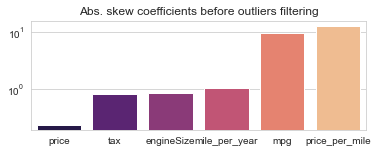

In [35]:
plt.figure(figsize=(6,2))
sns.barplot(x=list(skew_val_init.keys()), 
            y=np.abs(list(skew_val_init.values())),
           palette='magma')
plt.yscale('log')
plt.title('Abs. skew coefficients before outliers filtering')

The standard value for skewness is between -1 and 1. Some features are highly skewed and migth contains outliers :
* price_per_mile
* price
* mpg

### **7.5 Filtering outliers**

In [36]:
threshold = 2.5
z = np.abs(stats.zscore(bmw_prepoc_data_0.select_dtypes(exclude=['object'])))
bmw_prepoc_data_0 = bmw_prepoc_data_0[(z < threshold).all(axis=1)]

In [37]:
new_len = bmw_prepoc_data_0.shape[0]
bmw_prepoc_data_0.shape

(9628, 9)

In [38]:
print('{:.2f}% ({} rows) of the initial data have been filtered to exclude outliers.'.format((1-new_len/initial_len)*100, initial_len-new_len))

10.69% (1153 rows) of the initial data have been filtered to exclude outliers.


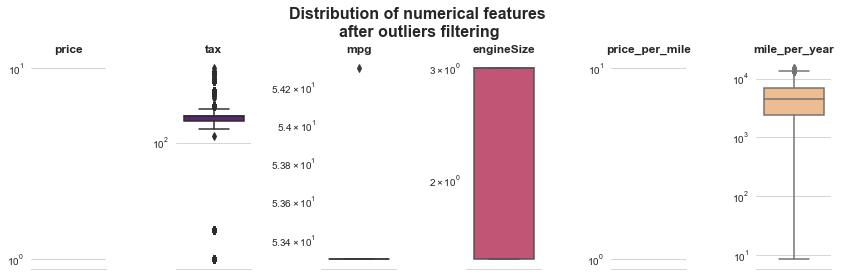

In [39]:
sns.set_style("whitegrid")
fig, axs = plt.subplots(1, 6, 
                        figsize=(12, 4)
                       )

fig.suptitle('Distribution of numerical features \nafter outliers filtering', fontsize=16, weight='bold')
for i, col in enumerate(bmw_prepoc_data_0.select_dtypes(exclude=['object']).columns):
    data=bmw_prepoc_data_0[col]
    sns.boxplot(data=data, 
                ax=axs[i],
                y=data,
                color=col_list[i])
    axs[i].set_title(col, weight='bold')
    axs[i].tick_params(bottom=False)
    axs[i].set(ylabel=None)
    axs[i].set_yscale('log')

sns.despine(left=True)
fig.tight_layout(pad=2.0, h_pad=2.0)
plt.subplots_adjust(top=0.80)

In [40]:
skew_val_final = dict()
for col in bmw_prepoc_data_0.select_dtypes(exclude=['object']).columns:
    skew_coeff = bmw_prepoc_data_0[col].skew().round(2)
    skew_val_final[col]=skew_coeff
    
skew_val_final = dict(sorted(skew_val_final.items(), key=lambda item: item[1]))

Text(0.5, 1.0, 'Abs. skew coefficients after outliers filtering')

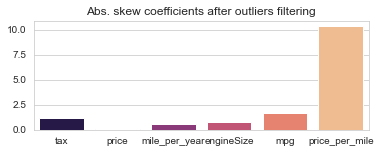

In [41]:
plt.figure(figsize=(6,2))
sns.barplot(x=list(skew_val_final.keys()), 
            y=np.abs(list(skew_val_final.values())),
           palette='magma')
plt.title('Abs. skew coefficients after outliers filtering')

The *price_per_mile* feature is still highly skewed. Let's start to prepare the model with this preprocessing to see if results are acceptable.

In [42]:
bmw_preproc_data = bmw_prepoc_data_0.copy()
#bmw_preproc_data = bmw_preproc_data[bmw_preproc_data.index!=6451]
bmw_preproc_data.shape

(9628, 9)

## **8. Model Development**

In this part, we are going to test several of the most efficient algorithms for regression. 

To sort the different models, we will use the 3 metrics described above in the document :  R², RSE and RMSE.

The data will be randomly shuffled and split into a training and validation set. We will make sure to evaluate the generalization performance of the models using k-fold cross-validationand we will find the best model hyper-parameters using grid search.

We will encode the categorical feature using one hot encoding.  

The first step of our model development is to split our features set and a target set.

In [43]:
# Split the data into features and target
X = bmw_preproc_data.drop('price', axis=1)
print(X.shape)

Y = bmw_preproc_data['price']

(9628, 8)


In [44]:
X['range'].value_counts()

S    7189
X    2241
M     109
Z      79
i      10
Name: range, dtype: int64

In [45]:
X['fuelType'].value_counts()

Diesel    6505
Petrol    2977
Hybrid     131
Other       15
Name: fuelType, dtype: int64

In [46]:
X['transmission'].value_counts()

Semi-Auto    4252
Automatic    3128
Manual       2248
Name: transmission, dtype: int64

In [47]:
# Creating colvalue_countslist to separate categorial features from numerical features
cat_features = X.select_dtypes(include=['object']).columns #['range', 'transmission', 'fuelType']
num_features = X.select_dtypes(exclude=['object']).columns #['mile_per_year', 'price_per_mile', 'tax', 'mpg', 'engineSize']

### **8.1 Categorical features encoding**

In [48]:
from sklearn.preprocessing import LabelBinarizer

X_onehot = X.copy()

encoded_features = pd.DataFrame()

for col in cat_features:
    lb = LabelBinarizer()
    lb_results = lb.fit_transform(X_onehot[col])
    lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)
    encoded_features = pd.concat([encoded_features, lb_results_df], axis=1)
    
#print(encoded_features.shape)

In [49]:
encoded_features.head(3)

,Automatic,Manual,Semi-Auto,Diesel,Hybrid,Other,Petrol,M,S,X,Z,i
0,1,0,0,1,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,1,0,1,0,0,0
2,1,0,0,1,0,0,0,0,1,0,0,0


### **8.2 Numerical features scaling**

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [51]:
RS = StandardScaler().fit(X_onehot[num_features])
rescaledX = RS.transform(X_onehot[num_features])
rescaledX = pd.DataFrame(rescaledX, columns=num_features)

In [52]:
X_onehot_final = pd.concat([rescaledX.reset_index(), encoded_features], axis=1)

In [53]:
X_onehot_final.drop('index', axis=1, inplace=True)

In [54]:
#Dropping some encoded variable to prevent multicollinearity issues
X_onehot_final.drop(columns=['S', 'Diesel', 'Semi-Auto'], axis=1, inplace=True)

### **8.3 Preparing train and test set**

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_onehot_final,
                                                    Y, 
                                                    test_size = 0.25, 
                                                    random_state=42)

In [56]:
X_train.head()

,tax,mpg,engineSize,price_per_mile,mile_per_year,Automatic,Manual,Hybrid,Other,Petrol,M,X,Z,i
5058,0.425191,-0.066983,-1.334146,-0.192198,-0.076400,0,1,0,0,1,0,0,0,0
5106,1.411134,-0.804756,-0.312061,-0.195769,-0.546991,0,0,0,0,1,0,0,0,0
7341,-2.532640,6.045991,-0.312061,-0.201876,2.768321,1,0,1,0,0,0,0,0,0
6664,0.326596,-1.083302,1.732110,-0.189912,-0.234805,1,0,0,0,1,0,0,0,0
70,-0.067781,-0.142266,-1.334146,-0.197673,0.940850,0,1,0,0,1,0,0,0,0


In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor 

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [58]:
def RSE(y_true, y_predicted):
    """
    - y_true: Actual values
    - y_predicted: Predicted values
    """
    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)
    RSS = np.sum(np.square(y_true - y_predicted))

    rse = np.sqrt(RSS / (len(y_true) - 2))
    return rse

### **8.4 Model selection**

Several model exists for multivariate regression analysis. In order to select the best, we are going to test each on the test set.
We will select the model with a highest score.

In [59]:
model_label = ['LinearRegression',
              'Lasso',
              'Ridge',
              'ElasticNet',
              'DecisionTreeRegressor',
              'KNeighborsRegressor',
              'GradientBoostingRegressor',
              'XGBRegressor']

In [60]:
model_list = [LinearRegression(),
              Lasso(),
              Ridge(),
              ElasticNet(),
              DecisionTreeRegressor(),
              KNeighborsRegressor(),
              GradientBoostingRegressor(),
              XGBRegressor()]

In [61]:
score = []
for i, model in enumerate(model_list):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds).round(4)
    rse = RSE(y_test, preds).round(4)
    rmse = mean_squared_error(y_test, preds).round(4)
    score.append((model_label[i], r2, rse, rmse))

In [62]:
pd.DataFrame(score, columns=['Model', 'R2', 'RSE', 'RMSE']).sort_values(by='R2', ascending=False)

,Model,R2,RSE,RMSE
7,XGBRegressor,0.9473,0.1004,0.0101
6,GradientBoostingRegressor,0.9190,0.1245,0.0155
4,DecisionTreeRegressor,0.8983,0.1395,0.0194
5,KNeighborsRegressor,0.8231,0.1840,0.0338
0,LinearRegression,0.6726,0.2503,0.0626
2,Ridge,0.6723,0.2504,0.0626
1,Lasso,-0.0000,0.4374,0.1912
3,ElasticNet,-0.0000,0.4374,0.1912


For our regression problem, the XGBRegressor model has the best performance. Now we can optimize hyperparameter to try to have a better score.

### **8.5 Model hyperparameter tuning**

A grid of parameters needs to be created to use with grid search to find the optimal tuning pa-rameters for the model.  

The default parameters are:  
*max_depth=3, learning_rate=0.1, n_estimators=100, verbosity=1, silent=None, objective='reg:squarederror', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, importance_type='gain'*

**Explanation of relevant parameters for this kernel**

* booster: Select the type of model to run at each iteration
* gbtree: tree-based models
* gblinear: linear models
* nthread: default to maximum number of threads available if not set
* objective: This defines the loss function to be minimized

**Parameters for controlling speed**

* subsample: Denotes the fraction of observations to be randomly samples for each tree
* colsample_bytree: Subsample ratio of columns when constructing each tree.
* n_estimators: Number of trees to fit.

**Important parameters which control overfiting**

* learning_rate: Makes the model more robust by shrinking the weights on each step.
* max_depth: The maximum depth of a tree.
* min_child_weight: Defines the minimum sum of weights of all observations required in a child.

The most important parameters of a XGB regressor model are *n_estimators*, *max_depth* and the *learning_rate*.

In [ ]:
from sklearn.model_selection import GridSearchCV

#XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

Best parameters for a XGBRegressor model:

In [ ]:
hyperParameterTuning(X_train, y_train)

In [63]:
final_model = XGBRegressor(colsample_bytree=0.7,
                     learning_rate=0.1,
                     max_depth=7,
                     min_child_weight=1,
                     n_estimators=500,
                     objective='reg:squarederror',
                     subsample=0.7)

In [64]:
final_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [65]:
y_pred = final_model.predict(X_test)
r2 = r2_score(y_test, y_pred).round(4)
print('R² : {}'.format(r2))
# adjusted R-squared
adj_r2 = round(1 - (1 - r2)*((len(X_test)-1)/(X_test.shape[0]-X_test.shape[1]-1)), 4)
print('Adj. R² : {}'.format(adj_r2))
rse = RSE(y_test, y_pred).round(4)
print('RSE : {}'.format(rse))
rmse = mean_squared_error(y_test, y_pred).round(4)
print('RMSE : {}'.format(rmse))

R² : 0.9499
Adj. R² : 0.9496
RSE : 0.0979
RMSE : 0.0096


The last score is a little bit higher than the model with standard parameter.

### **8.6 Checking model quality**

A perfect fit between Y and Y_pred should give a line. With the following graph, we can see how large are the residual errors.
Even if it is not perfect, the model is well fitted. Almost 98% of the variability observed is captured by our model.

In [66]:
from yellowbrick.regressor import prediction_error
#from yellowbrick.regressor import residuals_plot
#from yellowbrick.regressor import cooks_distance

In [67]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

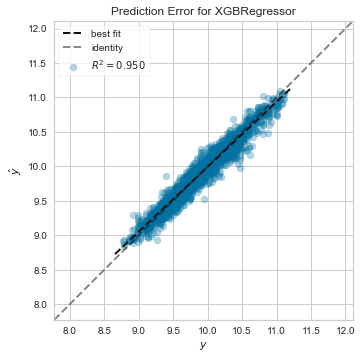

PredictionError(alpha=0.3,
                ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000002B7EA876FC8>,
                model=None)

In [68]:
prediction_error(final_model,X_train, y_train, X_test, y_test, alpha=0.3)

In [69]:
def acf(x, length=20):
    return np.array([1]+[np.corrcoef(x[:-i], x[i:])[0,1]  \
        for i in range(1, length)])

Text(0.5, 1.0, 'Autocorr coef : -0.0')

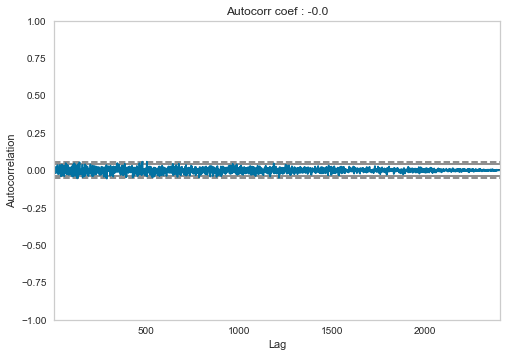

In [70]:
pd.plotting.autocorrelation_plot(y_test-y_pred)
plt.title('Autocorr coef : '+str(round((y_test-y_pred).autocorr(),2)))

In [71]:
import statsmodels.api as sm

Comparing sklearn and statsmodel's OLS regression

In [72]:
X_ols = X_onehot_final.values
X_ols = sm.add_constant(X_ols)
Y_ols = Y.values
model_ols = sm.OLS(Y_ols, X_ols)
results = model_ols.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     1411.
Date:                Wed, 08 Sep 2021   Prob (F-statistic):               0.00
Time:                        10:35:34   Log-Likelihood:                -251.69
No. Observations:                9628   AIC:                             533.4
Df Residuals:                    9613   BIC:                             641.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9991      0.005   1986.852      0.0

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

for i in range(len(X_onehot_final.columns)):
    print(vif(X_onehot_final.values, i))

1.6993157572231528
3.2861579219716384
1.6440516532223866
1.106715790374767
1.3143318233428907
1.3783119508219992
1.4993516601975352
1.374502918717516
1.112650451093385
2.1974219026724606
1.1212979279247937
1.2710898051939838
1.0339905648453191
1.094567854628216


In [74]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(y_test-y_pred)

2.0014438860765744

In [75]:
from scipy.stats.stats import pearsonr

for column in X_onehot_final.columns:
    corr_test = pearsonr(X_onehot_final[column], results.resid)
    print(f'Variable: {column} --- correlation: {corr_test[0]:.4f}, p-value: {corr_test[1]:.4f}')

Variable: tax --- correlation: -0.0000, p-value: 1.0000
Variable: mpg --- correlation: 0.0000, p-value: 1.0000
Variable: engineSize --- correlation: 0.0000, p-value: 1.0000
Variable: price_per_mile --- correlation: 0.0000, p-value: 1.0000
Variable: mile_per_year --- correlation: 0.0000, p-value: 1.0000
Variable: Automatic --- correlation: -0.0000, p-value: 1.0000
Variable: Manual --- correlation: -0.0000, p-value: 1.0000
Variable: Hybrid --- correlation: 0.0000, p-value: 1.0000
Variable: Other --- correlation: 0.0000, p-value: 1.0000
Variable: Petrol --- correlation: -0.0000, p-value: 1.0000
Variable: M --- correlation: 0.0000, p-value: 1.0000
Variable: X --- correlation: 0.0000, p-value: 1.0000
Variable: Z --- correlation: -0.0000, p-value: 1.0000
Variable: i --- correlation: -0.0000, p-value: 1.0000


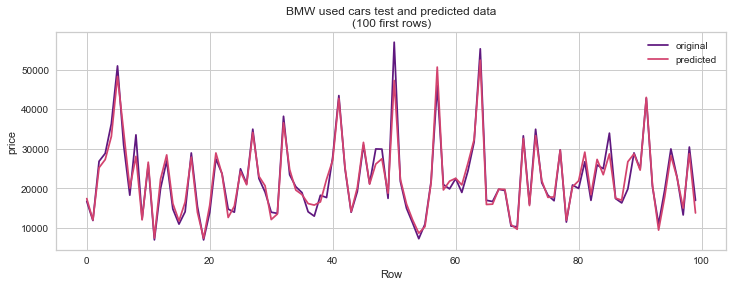

In [76]:
plt.figure(figsize=(12,4))
x_ax = np.arange(100)
plt.plot(x_ax, np.exp(y_test[0:100]), label="original", color=col_list[1])
plt.plot(x_ax, np.exp(y_pred[0:100]), label="predicted", color=col_list[3])

plt.title("BMW used cars test and predicted data\n(100 first rows)")
plt.ylabel('price')
plt.xlabel('Row')
plt.legend()
plt.show()

We can observe on this sample that predicted prices (in $) are close from the target.

In [81]:
from scipy.stats import norm

def residual_plot(y_test, y_predicted,main_title):
    """
    Function to plot the residual distribution calculated from y_test and y_predicted.
    
    Inputs
    -------
    - y_test: the log transformed target values
    - y_predicted: raw predictions from the algorithm
    - main_title: main title of the plot
    
    Returns
    -------
    - a plot containing 3 subplots: Scatter plot, Histogram and Q-Q plot
    
    
    """
    #res =  np.expm1(y_test) - np.expm1(y_predicted)
    res =  y_test - y_predicted
    fig, axs = plt.subplots(1,3, figsize=(18, 5))
    ##D’Agostino’s K^2 Test
    stat, p = stats.kstest(res, 'norm')
    print("Performing a Kolmogorov-Smirnov Test for a normal distribution of residuals.")
    print("H0 = The distribution is Gaussian.\nP value to reject H0 is p= 0.05 = 5%")
    print('Statistics=%.3f, p=%.5f' % (stat, p))
    # interpretation of the test
    alpha = 0.05
    if p > alpha:
        print("failed to reject H0 (H0 = The distribution is Gaussian).Can't accept any hypothesis. ")
    else:
        print('The distribution does not look Gaussian (H0 is rejected)')
    #End of D’Agostino’s K^2 Test
    #Begin of plotting
    plt.suptitle(f'{main_title} ; mean_residual =  {res.mean():.1f}, std= {res.std():.1f},  skew =  {res.skew():.4f} , kurtosis= {res.kurtosis():.2f}'  )
    axs[0].title.set_text('Scatter Plot y_test vs residuals(true-predicted)')
    axs[0].scatter(y_test,res)
    axs[1].title.set_text('Histogram of residuals')
    sns.distplot(res, fit=norm, ax = axs[1]);
    axs[2].title.set_text('Q-Q plot')
    sm.qqplot(res, norm, fit=True,distargs=(4,),line = '45', ax=axs[2])
    plt.show()

In [82]:
from statsmodels.stats.stattools import jarque_bera
jarque_bera(y_test - y_pred)

(274.9899200650252,
 1.9350739583679774e-60,
 0.2936492519880317,
 4.548219123299532)

Performing a Kolmogorov-Smirnov Test for a normal distribution of residuals.
H0 = The distribution is Gaussian.
P value to reject H0 is p= 0.05 = 5%
Statistics=0.401, p=0.00000
The distribution does not look Gaussian (H0 is rejected)


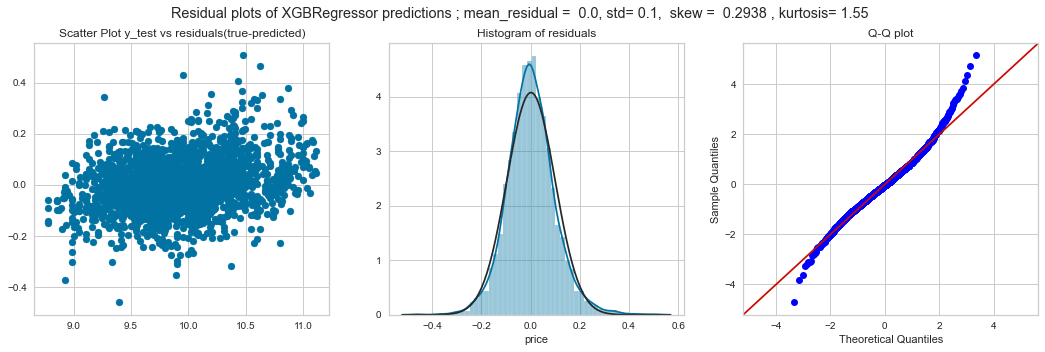

In [83]:
residual_plot(y_test, y_pred ,"Residual plots of XGBRegressor predictions")

The distribution of residuals has not a perfect normal distribution. It means that the errors the model makes are not consistent across variables and observations, it could be due to the presence of other outliers. However, the residuals distribution is normal enough to say that our model is good.

### **8.7 Feature importance**

In this paragraph, we will use permutation feature importance. This approach directly measures feature importance by observing how random re-shuffling (thus preserving the distribution of the variable) of each predictor influences model performance.

The approach can be described in the following steps:

1. Train the baseline model and record the score (accuracy/R²/any metric of importance) by passing the validation set. This can also be done on the training set, at the cost of sacrificing information about generalization.
2. Re-shuffle values from one feature in the selected dataset, pass the dataset to the model again to obtain predictions and calculate the metric for this modified dataset. The feature importance is the difference between the benchmark score and the one from the modified (permuted) dataset.
3. Repeat 2. for all features in the dataset.

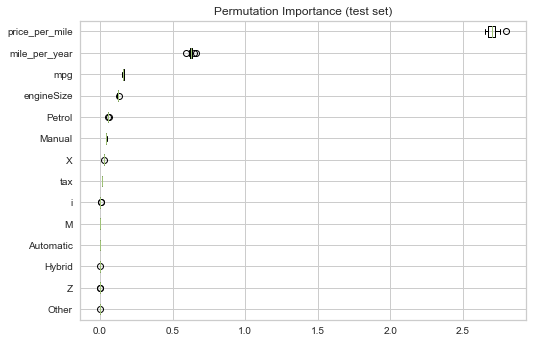

In [80]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2,
                                scoring='r2')
sorted_idx = result.importances_mean.argsort()

#plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(X_test.columns)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

The figure above shows the importance of each feature. The 3 most important features are:  

- price_per_mile
- mile_per_year
- engineSize  

These three factors are the ones that will most influence the depreciation of the price of a vehicle.

## **9. Conclusions**

### **9.1 Are our problems solved ?**

**Summary of our problems**  
- Can the depreciation of a car be estimated using machine learning?  
- What is the fair market price of a used car?  
- Is it possible to get a ‘reference’ price for a used car which takes into account its peculiarities?  

**Answers given trough the anlysis**

With a R² score of almost 0.95, it is clear that the price can be modeled and predicted accuratly with machine learning techniques. Several regression models have been trained and we selected the XGBRegressor model because it had the best score. With the default parameters, we have been able to reach a 0.946 R² score. After tuning the hyperparameter, the model have been improved and reached a R² score of 0.952.

The feature importance visualization help us to understand what are the main source of deprecation : price and mileage and engine size. Even if the model is not perfect, it provides to our final client a fair market price for BWM used car, a lot more precise than online price simulator. By using our predictive models the different stakeholders better estimate their selling and buying prices for used cars in an affordable and quick way.

### **9.2 Future work**

This study used different models in order to predict used car prices. However, there was a relatively small dataset for making a strong inference because number of observations was only 10781. Gathering more data can yield more robust predictions. Secondly, there could be more features that can be good predictors. For example, here are some variables that might improve the model: number of doors, color, mechanical and cosmetic reconditioning time, used-to-new ratio, appraisal-to-trade ratio.

Another point that that has room to improvement is that data cleaning process can be dome more rigorously with the help of more sophisticated technics. For example, we could use automatic outliers detection algorithm like Isolation Forest, Minimum Covariance Determinant or Local Outlier Factor.

Different scalers can be checked whether there is an improvement in prediction power of models or not.

## **10. References**

[1] https://github.com/datacamp/careerhub-data/blob/master/BMW%20Used%20Car%20Sales/bmw.csv  
[2] Practical Statistics for Data Scientists - O'Reilly - Peter Bruce, Andrew Bruce and Peter Gedeck  